# **Compiling the Data**

In [2]:
! pip install tmdbsimple
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm.notebook import tqdm_notebook

In [3]:
import json
with open ('/Users/Bijan Emadi/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
login.keys()

dict_keys(['api-key'])

In [4]:
import tmdbsimple as tmdb
tmdb.API_KEY = login['api-key']

In [5]:
movie = tmdb.Movies(603)
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/ncEsesgOJDNrTUED89hYbA117wo.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 60.198,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [6]:
def get_movie_with_rating(movie_id):
    # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
            info['certification'] = c['certification']
    return info

In [7]:
def write_json(new_data, filename):
    
    with open(filename, 'r+') as file:
        file_data = json.load(file)
        if (type(new_data)==list) & (type(file_data)==list):
            file_data.extend(new_data)
        else:
            file_data.append(new_data)
        file.seek(0)
        json.dump(file_data, file)

In [8]:
get_movie_with_rating(603)

{'adult': False,
 'backdrop_path': '/ncEsesgOJDNrTUED89hYbA117wo.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 63.733,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [14]:
import os
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [6]:
basics = pd.read_csv('Data/title_basics.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0093119,movie,Grizzly II: Revenge,Grizzly II: The Predator,0,2020,NaN,74,"Horror,Music,Thriller"


In [10]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79287 entries, 0 to 79286
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          79287 non-null  object 
 1   titleType       79287 non-null  object 
 2   primaryTitle    79287 non-null  object 
 3   originalTitle   79287 non-null  object 
 4   isAdult         79287 non-null  int64  
 5   startYear       79287 non-null  int64  
 6   endYear         0 non-null      float64
 7   runtimeMinutes  79287 non-null  int64  
 8   genres          79287 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 5.4+ MB


In [11]:
YEARS_TO_GET = [2002,2003,2004,2005,2006,2007,2008,2009]

In [12]:
YEAR = YEARS_TO_GET[0]
YEAR

2002

In [15]:
# Start of OUTER Loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS',
                         position=0):
    # Defining the JSON file to store results for year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if file exists
    file_exists = os.path.isfile(JSON_FILE)

    if file_exists == False:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    # Saving new year as the current df
    df = basics.loc[basics['startYear']==YEAR].copy()
    # Saving movie IDs to list
    movie_ids = df['tconst'].copy()
    movie_ids

    # Load existing data from json into a dataframe called 'previous_df'
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    #Get index and movie id from list
    # INNER Loop
    for movie_id in tqdm_notebook(movie_ids_to_get,
                                 desc=f'Movies from {YEAR}',
                                 position=1,
                                 leave=True):
        # Attempt to retrieve then data for the movie id
        try:
            temp = get_movie_with_rating(movie_id) # This uses your pre-made function
            # Append/extend results to existing file using a pre-made function
            write_json(temp, JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)

        except Exception as e:
            continue
    try:
        
            
        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)
        
    except:
        print(f'Error loading final {JSON_FILE}')

YEARS:   0%|          | 0/8 [00:00<?, ?it/s]

Movies from 2002:   0%|          | 0/1512 [00:00<?, ?it/s]

Movies from 2003:   0%|          | 0/1635 [00:00<?, ?it/s]

Movies from 2004:   0%|          | 0/1832 [00:00<?, ?it/s]

Movies from 2005:   0%|          | 0/2127 [00:00<?, ?it/s]

Movies from 2006:   0%|          | 0/2346 [00:00<?, ?it/s]

Movies from 2007:   0%|          | 0/2484 [00:00<?, ?it/s]

Movies from 2008:   0%|          | 0/2825 [00:00<?, ?it/s]

Movies from 2009:   0%|          | 0/3453 [00:00<?, ?it/s]

In [7]:
tmdb_2000=pd.read_csv(r'Data/final_tmdb_data_2000.csv.gz')
tmdb_2001=pd.read_csv(r'Data/final_tmdb_data_2001.csv.gz')

In [8]:
tmdb_2002=pd.read_csv(r'Data/final_tmdb_data_2002.csv.gz')
tmdb_2003=pd.read_csv(r'Data/final_tmdb_data_2003.csv.gz')
tmdb_2004=pd.read_csv(r'Data/final_tmdb_data_2004.csv.gz')
tmdb_2005=pd.read_csv(r'Data/final_tmdb_data_2005.csv.gz')
tmdb_2006=pd.read_csv(r'Data/final_tmdb_data_2006.csv.gz')
tmdb_2007=pd.read_csv(r'Data/final_tmdb_data_2007.csv.gz')
tmdb_2008=pd.read_csv(r'Data/final_tmdb_data_2008.csv.gz')
tmdb_2009=pd.read_csv(r'Data/final_tmdb_data_2009.csv.gz')

In [9]:
tmdb_00_09=pd.concat([tmdb_2000,tmdb_2001,tmdb_2002,tmdb_2003,tmdb_2004,tmdb_2005,tmdb_2006,tmdb_2007,tmdb_2008,tmdb_2009], axis=0)
tmdb_00_09

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,tt7786614,0.0,NaN,NaN,0.0,[],NaN,616643.0,en,Ci qing,...,0.0,100.0,[],Released,NaN,Tattoo,0.0,5.0,1.0,NaN
2355,tt8170758,0.0,NaN,NaN,0.0,[],NaN,513464.0,en,The Swell Season: One Step Away,...,0.0,61.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Swell Season: One Step Away,0.0,0.0,0.0,NR
2356,tt9330112,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,111622.0,ta,நினைத்தாலே இனிக்கும்,...,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Ninaithale Inikkum,0.0,4.0,1.0,NaN
2357,tt9556198,0.0,NaN,"{'id': 866148, 'name': 'Deep Sea Monster Raiga...",0.0,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",NaN,488412.0,ja,深海獣雷牙,...,0.0,80.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Deep Sea Monster Raiga,0.0,7.7,3.0,NaN


In [10]:
compression_opt = dict(method='zip',
                      archive_name='out.csv')
tmdb_00_09.to_csv('out.zip', index=False,compression=compression_opt)

In [11]:
tmdb_00_09.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG


In [12]:
sam_data = pd.read_csv(r'Data/combined_all_data.csv', lineterminator='\n')

In [13]:
sam_data

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0176694,0.0,/43VrmHOChLcAOG9S5tIFdsxr3u8.jpg,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,116369.0,en,Az ember tragédiája,...,0.0,166.0,"[{'english_name': 'Hungarian', 'iso_639_1': 'h...",Released,NaN,The Tragedy of Man,0.0,7.5,13.0,NaN
1,tt0210470,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,239465.0,en,50 Feet of String,...,0.0,53.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,50 Feet of String,0.0,6.0,3.0,NaN
2,tt0323808,0.0,NaN,NaN,7750000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",http://www.thewickertreemovie.com/,79544.0,en,The Wicker Tree,...,0.0,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Accept our sacrifice,The Wicker Tree,0.0,3.9,41.0,R
3,tt0372538,0.0,NaN,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.spythemovie.com/,323867.0,en,Spy,...,0.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Spy,0.0,7.0,1.0,NaN
4,tt0376136,0.0,/lsGygPY9Qt2OclZ67hAYoHLQhAf.jpg,NaN,45000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,23514.0,en,The Rum Diary,...,24000000.0,120.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,One part outrage. One part justice. Three part...,The Rum Diary,0.0,5.9,980.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39343,tt8942834,0.0,/pKBw9gnptdANzDGX6amFGWmlrpK.jpg,NaN,0.0,"[{'id': 10402, 'name': 'Music'}]",NaN,345474.0,en,Above & Beyond: Acoustic,...,0.0,82.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Above & Beyond: Acoustic,1.0,10.0,1.0,NaN
39344,tt9085782,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,668763.0,kn,Power,...,6293794.0,173.0,"[{'english_name': 'Kannada', 'iso_639_1': 'kn'...",Released,NaN,Power,0.0,5.0,2.0,NaN
39345,tt9208638,0.0,NaN,NaN,500.0,"[{'id': 27, 'name': 'Horror'}]",https://midnightreleasing.com/filmcatalog/carn...,782140.0,en,Carnivale Creepshow,...,0.0,74.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Come on in...to where the nightmares begin!,Carnivale Creepshow,0.0,2.0,1.0,NaN
39346,tt9287460,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",NaN,415457.0,en,Max Saves the World,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Max Saves the World,0.0,0.0,0.0,NaN


In [14]:
df=pd.concat([tmdb_00_09, sam_data], axis=0)

In [15]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55433 entries, 0 to 39347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                55433 non-null  object 
 1   adult                  55423 non-null  float64
 2   backdrop_path          33118 non-null  object 
 3   belongs_to_collection  3658 non-null   object 
 4   budget                 55423 non-null  float64
 5   genres                 55423 non-null  object 
 6   homepage               12711 non-null  object 
 7   id                     55423 non-null  float64
 8   original_language      55423 non-null  object 
 9   original_title         55423 non-null  object 
 10  overview               54129 non-null  object 
 11  popularity             55423 non-null  float64
 12  poster_path            49661 non-null  object 
 13  production_companies   55423 non-null  object 
 14  production_countries   55423 non-null  object 
 15  re

# **Hypothesis Testing**

**1. Does the MPAA rating of a movie affect how much revenue the movie generates?**

Null: There is no significant difference in revenue between the MPAA ratings of films.

Alt: There is a significant difference in the revenues between films of different MPAA ratings. 

Our target variable is numeric (revenue) and we have more than 2 samples (G/PG/PG-13/R/NC-17/NR) so we will perform an **ANOVA** along with a **post-hoc tukey test** if we reject the null hypothesis. 

**Assumption Testing**

In [41]:
df['certification'].value_counts()

R                                  6051
PG-13                              3163
NR                                 2901
PG                                 1362
G                                   427
NC-17                               143
Unrated                               6
-                                     2
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

There are inconsistencies in our certification column, but their sample sizes are negligible and can be removed from the data frame entirely.

In [42]:
counts = df['certification'].value_counts()

In [43]:
df_certs = df[~df['certification'].isin(counts[counts < 30].index)]

In [44]:
df_certs['certification'].value_counts()

R        6051
PG-13    3163
NR       2901
PG       1362
G         427
NC-17     143
Name: certification, dtype: int64

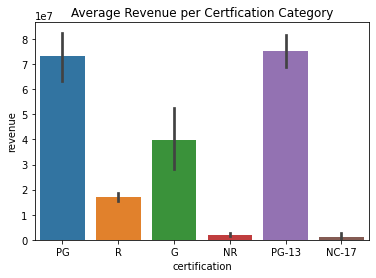

In [45]:
ax = sns.barplot(data=df_certs, x='certification', y='revenue')
ax.set_title('Average Revenue per Certfication Category');

Judging by the barplot, it appears there is indeed a difference in the revenue between categories, but we will perform the ANOVA to be sure.

Our sample sizes are large enough that we can **ignore the assumption of normality**

**Testing Equal Variance**


In [54]:
df_certs = df_certs.dropna(subset=['certification'], how='all')
df_certs.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
6,tt0119273,0.0,/fClJrAmJQ90zg9gWnfHVYSMiDTv.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.1,151.0,R
7,tt0119495,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,51181.0,en,Love 101,...,0.0,86.0,[],Released,NaN,Love 101,0.0,0.0,0.0,R
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.4,41.0,R


In [55]:
groups = {}
for i in df_certs['certification'].unique():
  data = df_certs.loc[df_certs['certification']==i, 'revenue'].copy()
  groups[i] = data
groups.keys()

dict_keys(['PG', 'R', 'G', 'NR', 'PG-13', 'NC-17'])

In [56]:
df_certs['certification'].value_counts()

R        6051
PG-13    3163
NR       2901
PG       1362
G         427
NC-17     143
Name: certification, dtype: int64

In [57]:
stats.levene(*groups.values())

LeveneResult(statistic=182.6695462715566, pvalue=4.7768021439765056e-189)

In [58]:
if result.pvalue < 0.05:
  print('The groups do not have equal variance, so we will perform a kruskal test')
else:
  print('The groups do have equal variance')

The groups do have equal variance


In [60]:
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=182.10972860950218, pvalue=1.770146010472062e-188)

Our pvalue is smaller than our alpha, so we will **reject the null hypothesis** and infer that there is a significant difference in the revenues between certification categories.

**2. Do higher-budget films also have higher average revenues?**

For this test, we will add a column that defines a film's budget as a categorical variable for the purpose of our hypothesis testing. For this example, we will define film budgets like so:

Low: Between 1 - 999,999

Med Low: 1,000,000 - 14,999,999

Med: 15,000,000 - 49,999,999

Med High: 50,000,000 - 99,999,999

High: +100,000,000

This according to example data obtained from the Directors Guild of America at https://www.dga.org/Contracts/Agreements/Low-Budget.aspx#:~:text=Level%201b%3A%20Films%20with%20budgets,to%20or%20less%20than%20%243%2C750%2C000. and StudioBinder at https://www.studiobinder.com/blog/production-budget/

**Null Hypothesis:** There is no difference in the revenue for films of different budget categories

**Alt Hypothesis:** There is some significant difference in the revenues for films of different budget categories.

Our target variable is numeric and we have more than 2 samples, so we will perform an ANOVA test.

In [65]:
df_budg = df
df_budg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55433 entries, 0 to 39347
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                55433 non-null  object 
 1   adult                  55423 non-null  float64
 2   backdrop_path          33118 non-null  object 
 3   belongs_to_collection  3658 non-null   object 
 4   budget                 55423 non-null  float64
 5   genres                 55423 non-null  object 
 6   homepage               12711 non-null  object 
 7   id                     55423 non-null  float64
 8   original_language      55423 non-null  object 
 9   original_title         55423 non-null  object 
 10  overview               54129 non-null  object 
 11  popularity             55423 non-null  float64
 12  poster_path            49661 non-null  object 
 13  production_companies   55423 non-null  object 
 14  production_countries   55423 non-null  object 
 15  re

In [74]:
def classify_budget(budget):
    if budget > 1 and budget < 999999:
        return 'low'
    elif budget > 1000000 and budget < 14999999:
        return 'med low'
    elif budget > 15000000 and budget < 49999999:
        return 'medium'
    elif budget > 50000000 and budget < 99999999:
        return 'med high'
    elif budget > 100000000:
        return 'high'
    else:
        return np.nan

In [75]:
df_budg['budget_class'] = df['budget'].apply(classify_budget)
df_budg.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,budget_class
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN,med low
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG,low


In [76]:
df_budg['budget_class'].value_counts()

med low     3867
low         3376
medium      1800
med high     635
high         383
Name: budget_class, dtype: int64

In [77]:
df_budg = df_budg.dropna(subset=['budget_class'], how='all')
df_budg.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,budget_class
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN,med low
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1882.0,PG,low
11,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.4,41.0,R,low
12,tt0120626,0.0,/6xz9H7IMK3W21SNwAVmE9oW6YjX.jpg,NaN,6105121.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",NaN,54380.0,pt,Capitães de Abril,...,123.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,Captains of April,0.0,6.3,46.0,NaN,med low
13,tt0120630,0.0,/e8fwYYDYmcht3YHIK6eTO4VfYPU.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.7,4023.0,G,medium


In [78]:
df_budg['budget_class'].value_counts()

med low     3867
low         3376
medium      1800
med high     635
high         383
Name: budget_class, dtype: int64

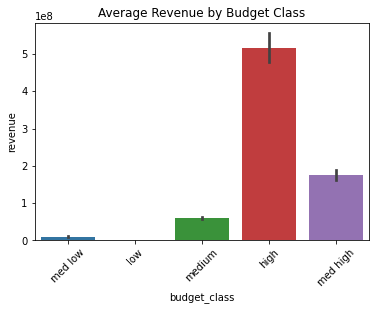

In [80]:
ax = sns.barplot(data=df_budg, x='budget_class', y='revenue')
ax.set_title('Average Revenue by Budget Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [81]:
groups = {}
for i in df_budg['budget_class'].unique():
    data = df_budg.loc[df_budg['budget_class']==i, 'revenue'].copy()
    groups[i] = data
groups.keys()

dict_keys(['med low', 'low', 'medium', 'high', 'med high'])

In [82]:
stats.levene(*groups.values())

LeveneResult(statistic=1441.3626806166, pvalue=0.0)

Our groups do not have equal variance, so we will use a kruskal test for our hypothesis

In [83]:
stats.kruskal(*groups.values())

KruskalResult(statistic=5446.554681459029, pvalue=0.0)

Our p value is less than 0.05, so we will **reject** the null hypothesis and infer that a film's budget does have some effect on its potential revenue.

**3. Does a film's budget class have an effect on it's vote average? (IMDB Quality rating)**

Null: There is no difference in the vote averages between budget classes

Alt: Budget class has a significant effect on a film's vote average.

Our target variable is numeric and we have more than one sample, so we will perform another ANOVA test.

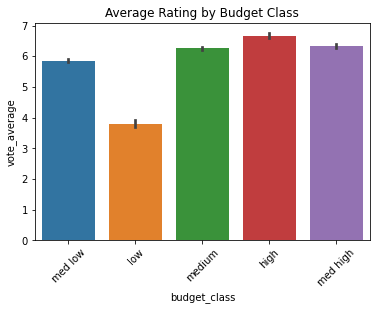

In [84]:
ax = sns.barplot(data=df_budg, x='budget_class', y='vote_average')
ax.set_title('Average Rating by Budget Class')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

In [85]:
groups = {}
for i in df_budg['budget_class'].unique():
    data = df_budg.loc[df_budg['budget_class']==i, 'vote_average'].copy()
    groups[i] = data
groups.keys()

dict_keys(['med low', 'low', 'medium', 'high', 'med high'])

In [86]:
stats.levene(*groups.values())

LeveneResult(statistic=1259.318474372895, pvalue=0.0)

In [87]:
stats.kruskal(*groups.values())

KruskalResult(statistic=1758.4255075686858, pvalue=0.0)